# 1. Data Understanding

Pada bagian ini, kita akan mengenal dan memahami data yang digunakan dalam proyek ini, yaitu **Pima Indians Diabetes Database**. Dataset ini berisi data medis yang bertujuan untuk memprediksi apakah seorang pasien menderita diabetes berdasarkan hasil pemeriksaan kesehatan.

## Gambaran Dataset
Dataset ini terdiri dari 768 data pasien, masing-masing memiliki 8 fitur medis dan 1 kolom target yang menunjukkan apakah pasien tersebut positif diabetes (1) atau tidak (0).

Berikut penjelasan fitur-fitur dalam dataset:
1. **Pregnancies**: Jumlah kehamilan yang pernah dialami pasien
2. **Glucose**: Kadar gula darah (glukosa) dalam plasma
3. **BloodPressure**: Tekanan darah diastolik (mm Hg)
4. **SkinThickness**: Ketebalan lipatan kulit (mm)
5. **Insulin**: Kadar insulin dalam darah (mu U/ml)
6. **BMI**: Indeks Massa Tubuh (berat badan/tinggi badan kuadrat)
7. **DiabetesPedigreeFunction**: Indikator riwayat keluarga dengan diabetes
8. **Age**: Usia pasien (tahun)
9. **Outcome**: 0 = tidak diabetes, 1 = diabetes (target prediksi)

## Tujuan Eksplorasi Data
Eksplorasi data ini bertujuan untuk:
1. Mengecek apakah ada data yang kosong (missing values)
2. Mengecek apakah ada data yang sama persis (duplikat)
3. Melihat sebaran nilai pada setiap fitur numerik
4. Menemukan nilai-nilai yang tidak wajar (outlier) pada data

Selanjutnya, kita akan mulai dengan melihat struktur data dan statistik dasarnya agar lebih memahami isi dataset ini.

In [12]:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

Import Library

Pada bagian ini, kita mengimpor berbagai library yang diperlukan untuk menjalankan proyek machine learning ini:

- **pandas**: Untuk mengelola dan memanipulasi data dalam bentuk tabel (DataFrame).
- **matplotlib.pyplot** & **seaborn**: Untuk membuat berbagai jenis visualisasi data seperti grafik, histogram, dan heatmap.
- **numpy**: Digunakan untuk perhitungan angka dan pengolahan array.

Dari *scikit-learn*, kita menggunakan:
- **train_test_split**: Untuk membagi data menjadi data latih dan data uji.
- **StandardScaler**: Untuk menstandarkan nilai fitur numerik agar berada pada skala yang sama.
- **LogisticRegression, RandomForestClassifier, SVC**: Algoritma yang digunakan untuk membuat model klasifikasi.
- **accuracy_score, precision_score, recall_score, f1_score, confusion_matrix**: Digunakan untuk mengukur dan mengevaluasi performa model klasifikasi.

In [13]:
# Load the dataset
df = pd.read_csv('dataset.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Informasi Dataset

Pada langkah awal, dilakukan pemeriksaan terhadap informasi dasar dari dataset yang digunakan. Dataset ini memuat sebanyak 768 baris data dengan total 9 kolom. Seluruh kolom pada dataset ini tidak memiliki data yang kosong atau hilang. Sebagian besar kolom bertipe data integer, kecuali kolom **DiabetesPedigreeFunction** yang bertipe float.

Berikut adalah daftar kolom yang terdapat pada dataset:
- **Pregnancies**: Jumlah kehamilan yang pernah dialami pasien
- **Glucose**: Kadar gula darah dalam plasma
- **BloodPressure**: Tekanan darah diastolik (mm Hg)
- **SkinThickness**: Ketebalan lipatan kulit (mm)
- **Insulin**: Kadar insulin dalam darah (mu U/ml)
- **BMI**: Indeks Massa Tubuh (berat badan dibagi tinggi badan kuadrat)
- **DiabetesPedigreeFunction**: Nilai yang menunjukkan riwayat keluarga dengan diabetes
- **Age**: Usia pasien (tahun)
- **Outcome**: Kolom target yang menunjukkan apakah pasien menderita diabetes (1) atau tidak (0)

Dengan mengetahui struktur dan tipe data pada setiap kolom, kita dapat lebih mudah dalam melakukan analisis dan pengolahan data pada tahap-tahap selanjutnya.

In [14]:
# Tampilkan beberapa baris pertama 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Tampilan Data

Pada bagian ini, ditampilkan beberapa baris awal dari dataset yang digunakan. Data tersebut memperlihatkan berbagai variabel numerik yang merepresentasikan kondisi medis pasien, seperti jumlah kehamilan yang pernah dialami, kadar gula darah (glukosa), tekanan darah, serta faktor-faktor lain yang menjadi dasar dalam memprediksi kemungkinan seseorang mengidap diabetes.

Sebagai contoh:
- Pasien pertama tercatat pernah mengalami 6 kali kehamilan, memiliki kadar glukosa sebesar 148, berusia 50 tahun, dan berdasarkan hasil diagnosis dinyatakan positif diabetes.
- Pasien kedua memiliki riwayat 1 kali kehamilan, kadar glukosa 85, usia 31 tahun, dan hasil diagnosis menunjukkan pasien tersebut tidak menderita diabetes.

Melalui data ini, kita dapat memahami bagaimana setiap fitur atau variabel dalam dataset berperan dalam proses analisis dan prediksi diabetes pada pasien.

In [15]:
# Statistik deskriptif 
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Statistik Deskriptif

Tabel statistik deskriptif memberikan ringkasan mengenai sebaran nilai pada setiap fitur numerik di dalam dataset. Berikut beberapa poin penting yang dapat diperhatikan dari hasil statistik ini:

- Pada kolom **Glucose**, rata-rata nilainya berada di kisaran 120. Namun, terdapat nilai minimum 0 yang kemungkinan besar menandakan adanya data yang tidak valid atau hilang, sehingga perlu diperiksa dan ditangani lebih lanjut.
- Kolom **Insulin** juga menunjukkan nilai minimum 0. Hal ini mengindikasikan bahwa ada data pasien dengan kadar insulin nol, yang secara medis kurang masuk akal dan mungkin merupakan data kosong yang belum diisi dengan benar.
- Untuk kolom **BMI**, rata-rata nilainya sekitar 31, sedangkan nilai maksimumnya mencapai 67. Ini menunjukkan bahwa terdapat variasi yang cukup lebar pada data BMI pasien, mulai dari nilai yang rendah hingga sangat tinggi.

Dari temuan ini, dapat disimpulkan bahwa beberapa fitur memiliki rentang nilai yang sangat berbeda dan terdapat kemungkinan data tidak valid. Oleh karena itu, proses normalisasi sangat penting dilakukan agar setiap fitur memiliki skala yang seragam dan tidak menyebabkan model machine learning menjadi bias terhadap fitur tertentu.

In [16]:
# Mengecek value yang hilang
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Pemeriksaan Data Kosong (Missing Values)

Setelah dilakukan pengecekan terhadap data, dapat dipastikan bahwa seluruh kolom pada dataset ini terisi penuh, tanpa adanya nilai yang kosong atau hilang. Setiap kolom memiliki total 768 data, sesuai dengan jumlah baris pada dataset. Dengan demikian, kita tidak perlu melakukan proses penanganan atau pengisian data kosong pada tahap ini, sehingga analisis dapat langsung dilanjutkan ke langkah berikutnya.

 Tidak ada missing values dalam dataset ini, seperti yang telah diverifikasi sebelumnya. Semua kolom memiliki 768 entri non-null.

In [ ]:
    #  data duplikat
    jumlah_duplikat = df.duplicated().sum()
    print(f"Jumlah baris duplikat: {jumlah_duplikat}")

    # Menampilkan baris  duplikat
    duplikat = df[df.duplicated()]
    print("Baris duplikat:")
    print(duplikat)

Jumlah baris duplikat: 0
Baris duplikat:
Empty DataFrame
Columns: [Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome]
Index: []


Dataset yang digunakan dalam proyek ini telah diperiksa dan tidak ditemukan adanya baris data yang duplikat. Artinya, setiap data pasien yang tercatat bersifat unik dan tidak ada pengulangan informasi. Dengan demikian, kita dapat melanjutkan proses analisis ke tahap berikutnya, yaitu memeriksa distribusi nilai pada setiap fitur serta mengidentifikasi kemungkinan adanya nilai-nilai ekstrem (outlier) dalam data. Tahapan ini penting untuk memastikan kualitas data sebelum digunakan dalam pemodelan machine learning.

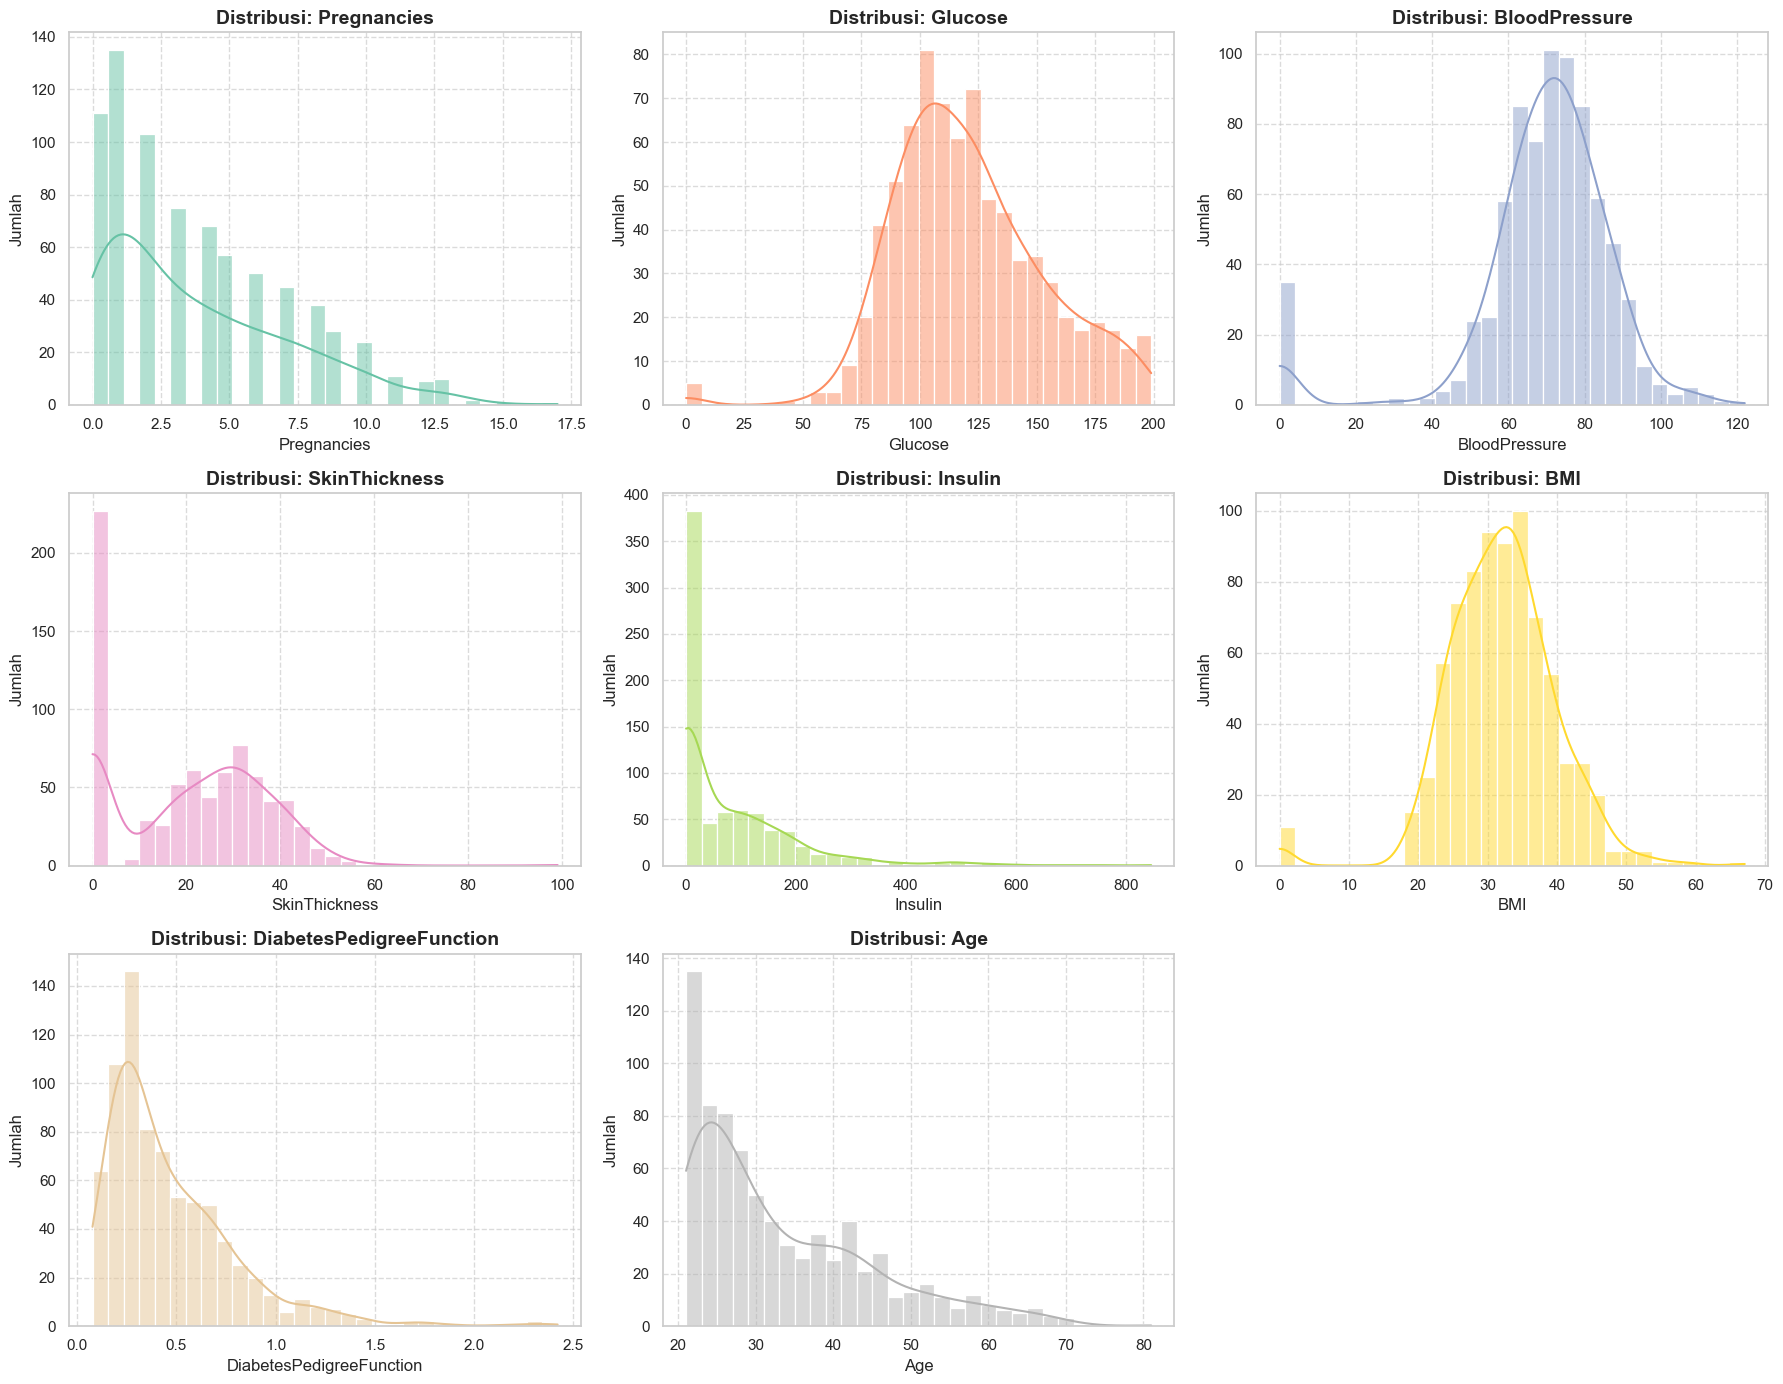

In [18]:
# Ambil data sebelum normalisasi, tanpa kolom target
features = df.drop(columns=['Outcome'])

# Set style visualisasi
sns.set(style="whitegrid")
palette = sns.color_palette("Set2", n_colors=len(features.columns))

plt.figure(figsize=(18, 14))
for i, col in enumerate(features.columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data=features, x=col, kde=True, bins=30, color=palette[i])
    plt.title(f'Distribusi: {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Jumlah', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Distribusi Setiap Fitur (Histogram + KDE)

- Beberapa fitur seperti **Pregnancies**, **Insulin**, **DiabetesPedigreeFunction**, dan **Age** memiliki sebaran data yang condong ke kanan (lebih banyak data di nilai rendah, sedikit di nilai tinggi).
- Fitur **Glucose**, **BloodPressure**, dan **BMI** memiliki sebaran data yang mendekati bentuk normal (simetris di sekitar rata-rata).

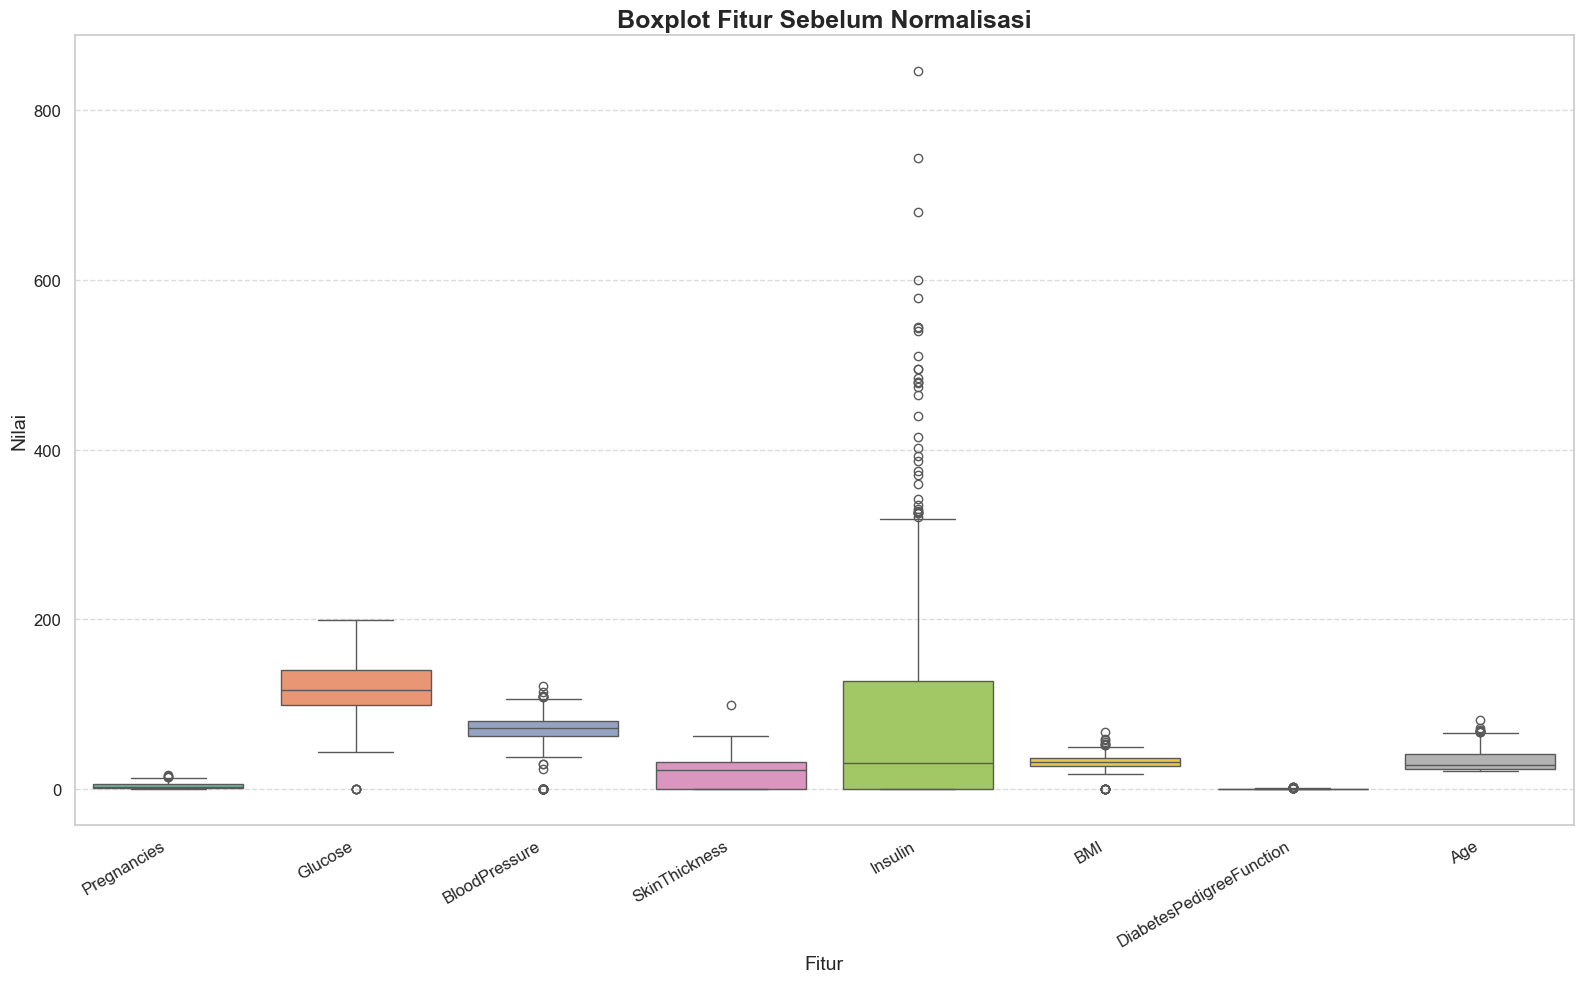

In [19]:
plt.figure(figsize=(16, 10))
sns.boxplot(data=features, palette=palette)
plt.title("Boxplot Fitur Sebelum Normalisasi", fontsize=18, fontweight='bold')
plt.xlabel("Fitur", fontsize=14)
plt.ylabel("Nilai", fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Boxplot Fitur Sebelum Normalisasi

- Dari boxplot terlihat ada beberapa nilai yang sangat jauh dari mayoritas data (**outlier ekstrem**), terutama pada fitur **Insulin**, **SkinThickness**, dan sebagian pada **BMI**. Namun, karena tujuan proyek ini adalah deteksi dini diabetes, data dengan nilai ekstrem tetap dipertahankan karena bisa saja mewakili kondisi medis yang benar-benar terjadi, seperti kadar insulin yang sangat tinggi.
- Rentang nilai antar fitur sangat berbeda-beda, sehingga proses normalisasi sangat penting agar model machine learning tidak berat sebelah terhadap fitur yang memiliki skala lebih besar.


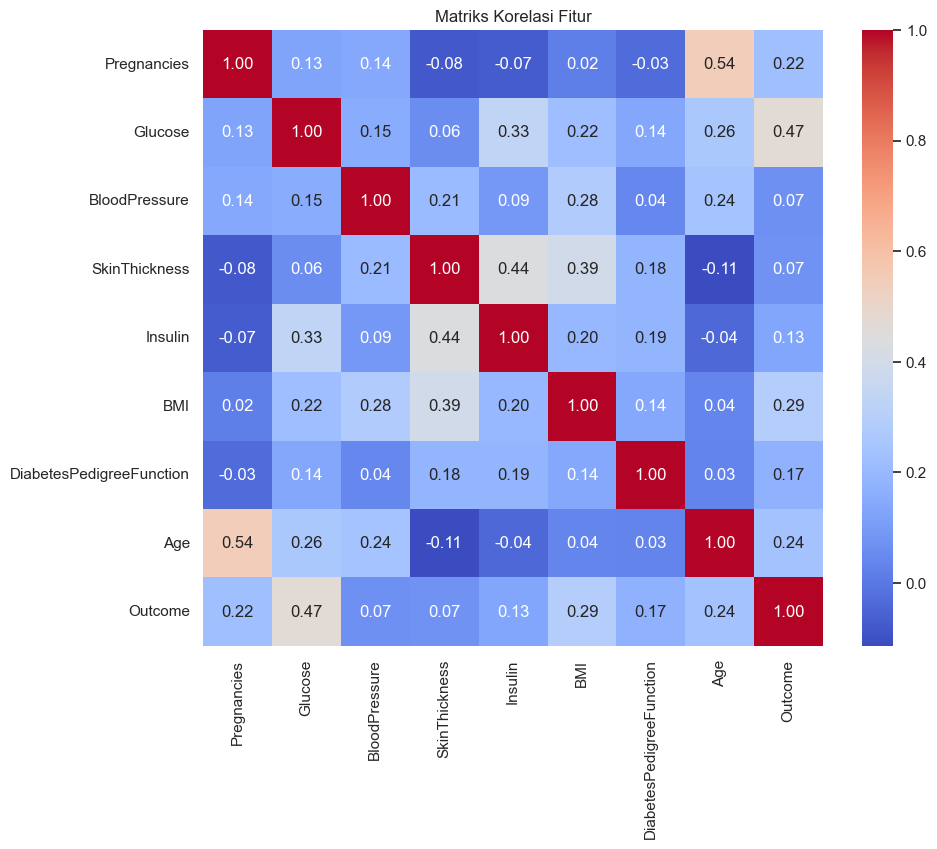

In [20]:
# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi Fitur")
plt.show()

## Matriks Korelasi

- Fitur **Glucose** (kadar gula darah) memiliki hubungan paling kuat dengan kolom target `Outcome` (hasil diagnosis diabetes), dengan nilai korelasi sekitar **0,47**. Artinya, semakin tinggi kadar glukosa seseorang, semakin besar kemungkinan orang tersebut terdiagnosis diabetes menurut data ini.
- Fitur **BMI** (Indeks Massa Tubuh) dan **Age** (Usia) juga menunjukkan hubungan yang cukup berarti dengan `Outcome`, meskipun tidak sekuat Glucose. Ini berarti orang dengan BMI tinggi atau usia lebih tua cenderung memiliki risiko diabetes yang lebih tinggi.
- Sementara itu, sebagian besar fitur lain dalam dataset ini tidak saling berhubungan secara kuat (nilai korelasinya rendah satu sama lain). Hal ini menunjukkan bahwa setiap fitur membawa informasi yang berbeda dan tidak terjadi tumpang tindih data (multikolinearitas rendah), sehingga seluruh fitur tetap penting untuk dianalisis secara terpisah.


# 2. Data Preparation

Pada tahap ini, data akan dipersiapkan sebelum digunakan untuk pelatihan model machine learning. Berdasarkan hasil eksplorasi data sebelumnya, ditemukan bahwa beberapa fitur memiliki distribusi yang tidak merata dan skala nilainya berbeda-beda. Hal ini dapat memengaruhi kinerja model jika tidak ditangani dengan benar. Oleh karena itu, pada tahap ini akan dilakukan dua proses utama, yaitu:

1. **Normalisasi Data**  
    Normalisasi bertujuan untuk menyamakan skala seluruh fitur numerik, sehingga setiap fitur memiliki kontribusi yang seimbang dalam proses pelatihan model. Dengan normalisasi, fitur yang memiliki rentang nilai besar tidak akan mendominasi fitur lain yang rentang nilainya lebih kecil.

2. **Pembagian Data (Splitting)**  
    Setelah data dinormalisasi, langkah berikutnya adalah membagi dataset menjadi dua bagian, yaitu data latih (training set) dan data uji (test set). Data latih digunakan untuk melatih model, sedangkan data uji digunakan untuk mengevaluasi performa model pada data yang belum pernah dilihat sebelumnya. Pembagian ini penting agar hasil evaluasi model lebih objektif dan tidak bias.

Dengan melakukan normalisasi dan pembagian data, kita memastikan bahwa proses pelatihan model berjalan optimal dan hasil evaluasi yang diperoleh dapat dipercaya.

In [21]:

scaler = StandardScaler()

Setelah proses normalisasi, seluruh fitur numerik pada data diubah sehingga memiliki rata-rata (mean) 0 dan standar deviasi 1. Langkah ini sangat penting karena membuat semua fitur berada pada skala yang sama, sehingga tidak ada fitur yang mendominasi proses pelatihan model hanya karena rentang nilainya lebih besar. Normalisasi sangat membantu terutama untuk algoritma machine learning yang sensitif terhadap perbedaan skala, seperti **Logistic Regression** atau **K-Nearest Neighbors**. Dengan data yang sudah dinormalisasi, model dapat belajar pola dari data secara lebih adil dan akurat, sehingga hasil prediksi yang dihasilkan pun menjadi lebih optimal.

In [22]:
# Kolompokkan fitur dan target
features = df.drop(columns=['Outcome'])

Seleksi Fitur

Memisahkan kolom fitur dari target (`Outcome`) agar dapat dilakukan proses normalisasi hanya pada fitur input.

In [23]:
# Normalisasi features
scaled_features = scaler.fit_transform(features)

Normalisasi Fitur

Melakukan standardisasi fitur numerik menggunakan `StandardScaler` agar semua fitur berada dalam skala yang sama (mean = 0, std = 1).

In [24]:
# Menyusun DataFrame baru setelah normalisasi
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)

Menyusun DataFrame Ternormalisasi

Mengubah hasil normalisasi (array) menjadi DataFrame dengan kolom yang sama seperti fitur asli.

In [25]:
# Menambahkan kolom target 'Outcome'
scaled_df['Outcome'] = df['Outcome']

Menambahkan Kolom Target

Menambahkan kembali kolom `Outcome` (target klasifikasi) ke dalam DataFrame yang sudah dinormalisasi.

In [26]:
scaled_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


Setelah normalisasi menggunakan **StandardScaler**, semua fitur numerik dalam dataset, seperti **Glucose**, **Insulin**, dan **BMI**, kini berada dalam rentang yang lebih seragam dengan nilai rata-rata 0 koma sekian dan standar deviasi 1. Proses ini memastikan bahwa fitur yang sebelumnya memiliki skala yang sangat bervariasi kini berada pada skala yang konsisten, sehingga model machine learning dapat memproses data dengan lebih efisien tanpa terpengaruh oleh perbedaan skala antar fitur. Kolom target **Outcome** tetap berada pada nilai asli (0 atau 1), karena ini adalah variabel kategorikal.

In [27]:
# Pemisahan Data menjadi Training dan Test Set
X = scaled_df.drop(columns=['Outcome'])  # Fitur
y = scaled_df['Outcome']  # Target

Pemisahan Fitur dan Target

Memisahkan variabel fitur (`X`) dan target (`y`) dari DataFrame yang sudah dinormalisasi untuk persiapan training dan evaluasi model.

In [ ]:
# Membagi data menjadi 80% training dan 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Dataset dibagi menjadi 80% data latih dan 20% data uji. Data latih digunakan untuk membangun model, sementara data uji digunakan untuk mengevaluasi kinerja model. Pembagian ini memastikan bahwa model dapat diuji dengan data yang tidak pernah dilihat sebelumnya, memberikan gambaran yang lebih akurat tentang kemampuan generalisasi model.

In [29]:
# Menampilkan ukuran data latih dan data uji
print(f"Ukuran data latih: {X_train.shape[0]} | Ukuran data uji: {X_test.shape[0]}")

Ukuran data latih: 614 | Ukuran data uji: 154


Menampilkan Ukuran Data Latih dan Uji

Menampilkan jumlah sampel pada data latih dan data uji untuk memastikan pemisahan dataset berjalan sesuai proporsi.

# 3. Modeling

Pada tahap ini, kita akan membuat dan membandingkan beberapa model machine learning untuk memecahkan masalah klasifikasi, yaitu memprediksi apakah seseorang menderita diabetes berdasarkan data medis yang tersedia.

### Pemilihan Model
Agar mendapatkan hasil yang optimal dan sesuai dengan tujuan solusi, kita akan menggunakan dan membandingkan tiga algoritma klasifikasi yang sering dipakai dan terbukti efektif di bidang kesehatan:

- **Logistic Regression**: Merupakan algoritma yang sederhana, mudah dipahami, dan sering digunakan sebagai baseline dalam masalah klasifikasi.
- **Random Forest**: Merupakan metode ensemble yang menggabungkan banyak pohon keputusan, sehingga lebih tahan terhadap overfitting dan sangat cocok untuk data tabular seperti dataset ini.
- **Support Vector Machine (SVM)**: Algoritma yang bekerja dengan mencari garis pemisah terbaik antara dua kelas, sangat efektif untuk masalah klasifikasi biner.

Dengan membandingkan lebih dari satu model, kita dapat menentukan metode mana yang paling baik dalam mendeteksi diabetes secara dini.

### Training Model
Setiap model akan dilatih menggunakan data latih (`X_train` dan `y_train`) yang sudah diproses pada tahap sebelumnya. Proses pelatihan dilakukan secara terpisah untuk memastikan setiap model mendapatkan kesempatan yang sama dalam mempelajari pola dari data.

### Evaluasi Model
Setelah proses pelatihan selesai, model akan diuji menggunakan data uji (`X_test`). Kinerja model akan dievaluasi menggunakan beberapa metrik berikut:

- **Accuracy**: Mengukur seberapa banyak prediksi model yang benar dibandingkan dengan seluruh data uji.
- **Precision**: Mengukur seberapa tepat model dalam memprediksi kasus positif (diabetes), yaitu dari semua prediksi positif, berapa yang benar-benar positif.
- **Recall**: Mengukur kemampuan model dalam menemukan semua kasus positif yang sebenarnya (sensitivitas).
- **F1-Score**: Merupakan rata-rata harmonis dari precision dan recall, sangat berguna jika data tidak seimbang antara kelas positif dan negatif.

Hasil evaluasi dari ketiga model akan disajikan dalam bentuk tabel dan grafik, sehingga kita dapat dengan mudah membandingkan performa masing-masing model dan memilih yang terbaik.

In [30]:
# Inisialisasi model
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', random_state=42)
}

Inisialisasi Model

Membuat tiga model klasifikasi yang akan digunakan: Logistic Regression, Random Forest, dan SVM, masing-masing dengan parameter dasar dan `random_state=42` untuk reproduktibilitas.

In [31]:
# Dictionary untuk menyimpan hasil evaluasi
results = {}
conf_matrices = {}

Inisialisasi Tempat Penyimpanan Hasil

Membuat dictionary `results` untuk menyimpan metrik evaluasi, dan `conf_matrices` untuk menyimpan confusion matrix dari setiap model.

In [32]:
# Menguji setiap model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    results[name] = [accuracy, precision, recall, f1]
    conf_matrices[name] = cm

Pelatihan dan Evaluasi Model

Melatih setiap model pada data latih, lalu melakukan prediksi pada data uji.  
Setelah itu, dihitung metrik evaluasi (accuracy, precision, recall, dan F1-score) serta confusion matrix untuk setiap model, dan disimpan ke dalam dictionary.

In [33]:
# Menampilkan hasil evaluasi
metrics_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1-Score"])
print("Evaluasi Metrik Setiap Model:")
display(metrics_df.T)

Evaluasi Metrik Setiap Model:


,Accuracy,Precision,Recall,F1-Score
Logistic Regression,0.753247,0.649123,0.672727,0.660714
Random Forest,0.727273,0.618182,0.618182,0.618182
SVM,0.727273,0.632653,0.563636,0.596154


Menampilkan Tabel Evaluasi

Mengubah hasil evaluasi dari semua model menjadi DataFrame, lalu menampilkannya dalam bentuk tabel agar mudah dibandingkan.

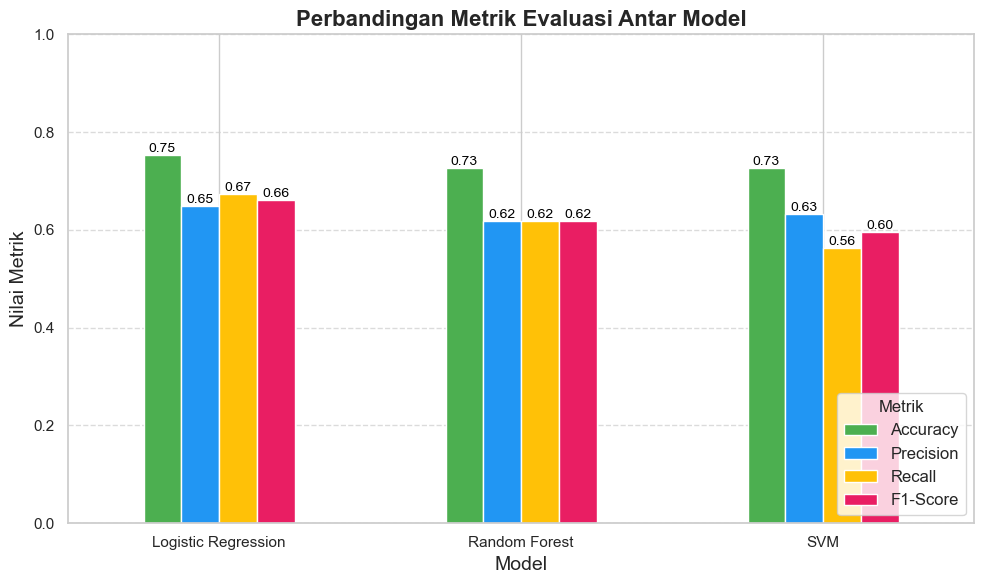

In [37]:
ax = metrics_df.T.plot(kind='bar', figsize=(10, 6), rot=0, color=['#4CAF50', '#2196F3', '#FFC107', '#E91E63'])
plt.title("Perbandingan Metrik Evaluasi Antar Model", fontsize=16, fontweight='bold')
plt.xlabel("Model", fontsize=14)
plt.ylabel("Nilai Metrik", fontsize=14)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Metrik", fontsize=12, title_fontsize=12, loc='lower right')

# Menampilkan nilai di atas setiap batang
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Visualisasi Perbandingan Metrik

Menampilkan grafik batang untuk membandingkan nilai metrik evaluasi (Accuracy, Precision, Recall, F1-Score) dari setiap model secara visual.

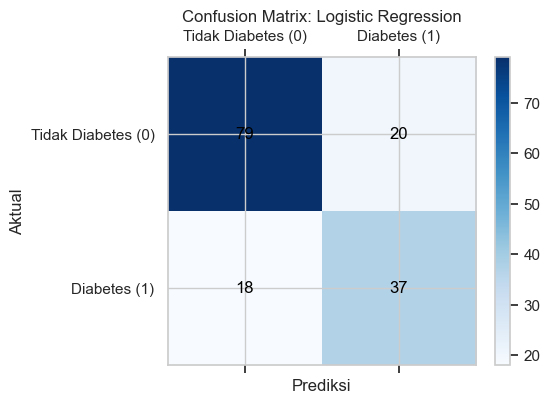

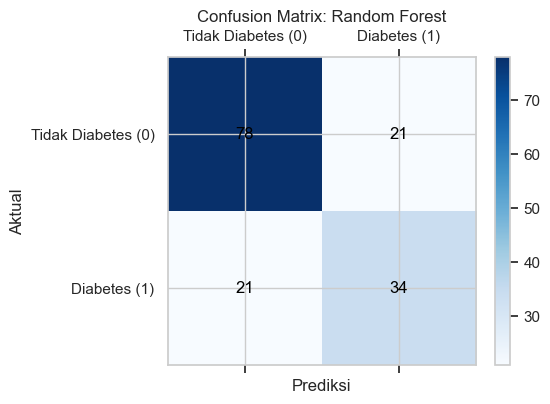

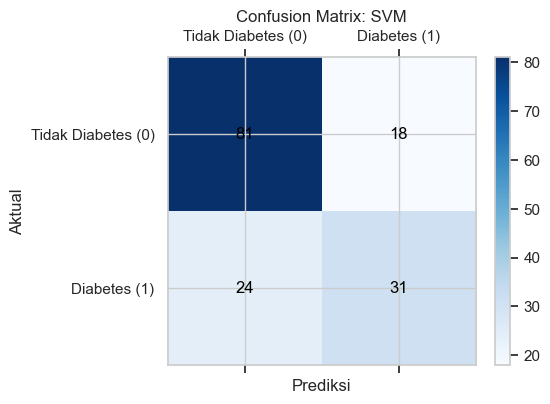

In [ ]:
# Visualisasi Confusion Matrix
for name, cm in conf_matrices.items():
    fig, ax = plt.subplots(figsize=(5, 4))
    cax = ax.matshow(cm, cmap='Blues')
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, f'{val}', ha='center', va='center', color='black')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.xticks([0, 1], ['Tidak Diabetes (0)', 'Diabetes (1)'])
    plt.yticks([0, 1], ['Tidak Diabetes (0)', 'Diabetes (1)'])
    plt.colorbar(cax)
    plt.show()

Visualisasi Confusion Matrix

Menampilkan confusion matrix untuk masing-masing model untuk melihat jumlah prediksi benar dan salah pada masing-masing kelas (positif dan negatif diabetes).

**Hasil Evaluasi Model**

Setelah melatih ketiga model — **Logistic Regression**, **Random Forest**, dan **Support Vector Machine (SVM)** — kami melakukan evaluasi terhadap kinerja masing-masing menggunakan empat metrik utama: Accuracy, Precision, Recall, dan F1-Score. Berikut adalah hasil evaluasi lengkap:

| Model               | Accuracy | Precision | Recall | F1-Score |
|---------------------|----------|-----------|--------|----------|
| Logistic Regression | **0.753** | **0.649**   | **0.673** | **0.661**  |
| Random Forest       | 0.727    | 0.618     | 0.618  | 0.618    |
| SVM                 | 0.727    | 0.633     | 0.564  | 0.596    |

**Interpretasi Hasil**

- **Logistic Regression** menunjukkan performa terbaik di antara ketiga model pada semua metrik evaluasi utama. Model ini mencapai **akurasi tertinggi sebesar 75.32%**, serta memiliki **precision, recall, dan F1-score** yang lebih baik dibandingkan Random Forest dan SVM.
- Model ini memiliki **64.91% precision**, yang berarti sekitar 65% dari semua kasus yang diprediksi sebagai diabetes benar-benar positif.
- Dengan **67.27% recall**, model berhasil mendeteksi sebagian besar pasien yang benar-benar mengidap diabetes.
- F1-score sebesar **66.07%** mengindikasikan keseimbangan yang baik antara precision dan recall.

**Confusion Matrix**

Model Logistic Regression menghasilkan confusion matrix sebagai berikut:

- **Benar Negatif (True Negative)**: 79 kasus tidak diabetes diklasifikasikan dengan benar.
- **Benar Positif (True Positive)**: 37 kasus diabetes diklasifikasikan dengan benar.
- **False Positive**: 20 kasus tidak diabetes yang salah diklasifikasikan sebagai diabetes.
- **False Negative**: 18 kasus diabetes yang salah diklasifikasikan sebagai tidak diabetes.

**Kesimpulan**

Berdasarkan hasil evaluasi, **Logistic Regression dipilih sebagai model terbaik** untuk kasus ini karena memiliki performa paling seimbang dan konsisten di seluruh metrik. Meskipun masih ada ruang untuk perbaikan, terutama dalam hal false negative, model ini memberikan dasar yang kuat dan dapat ditingkatkan lebih lanjut dengan teknik tuning atau ensemble di masa depan.

Data Pasien (Input Baru):
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI  \
0           12       67             84             29       59   34   

   DiabetesPedigreeFunction  Age  
0                         0   69  

Hasil Prediksi: Tidak Diabetes (0)
Probabilitas Keyakinan Model: 0.7477

Indikator Risiko Tidak Diabetes:
  - Semua fitur berada dalam rentang yang wajar.


c:\Users\AndhikaSep\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\AndhikaSep\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


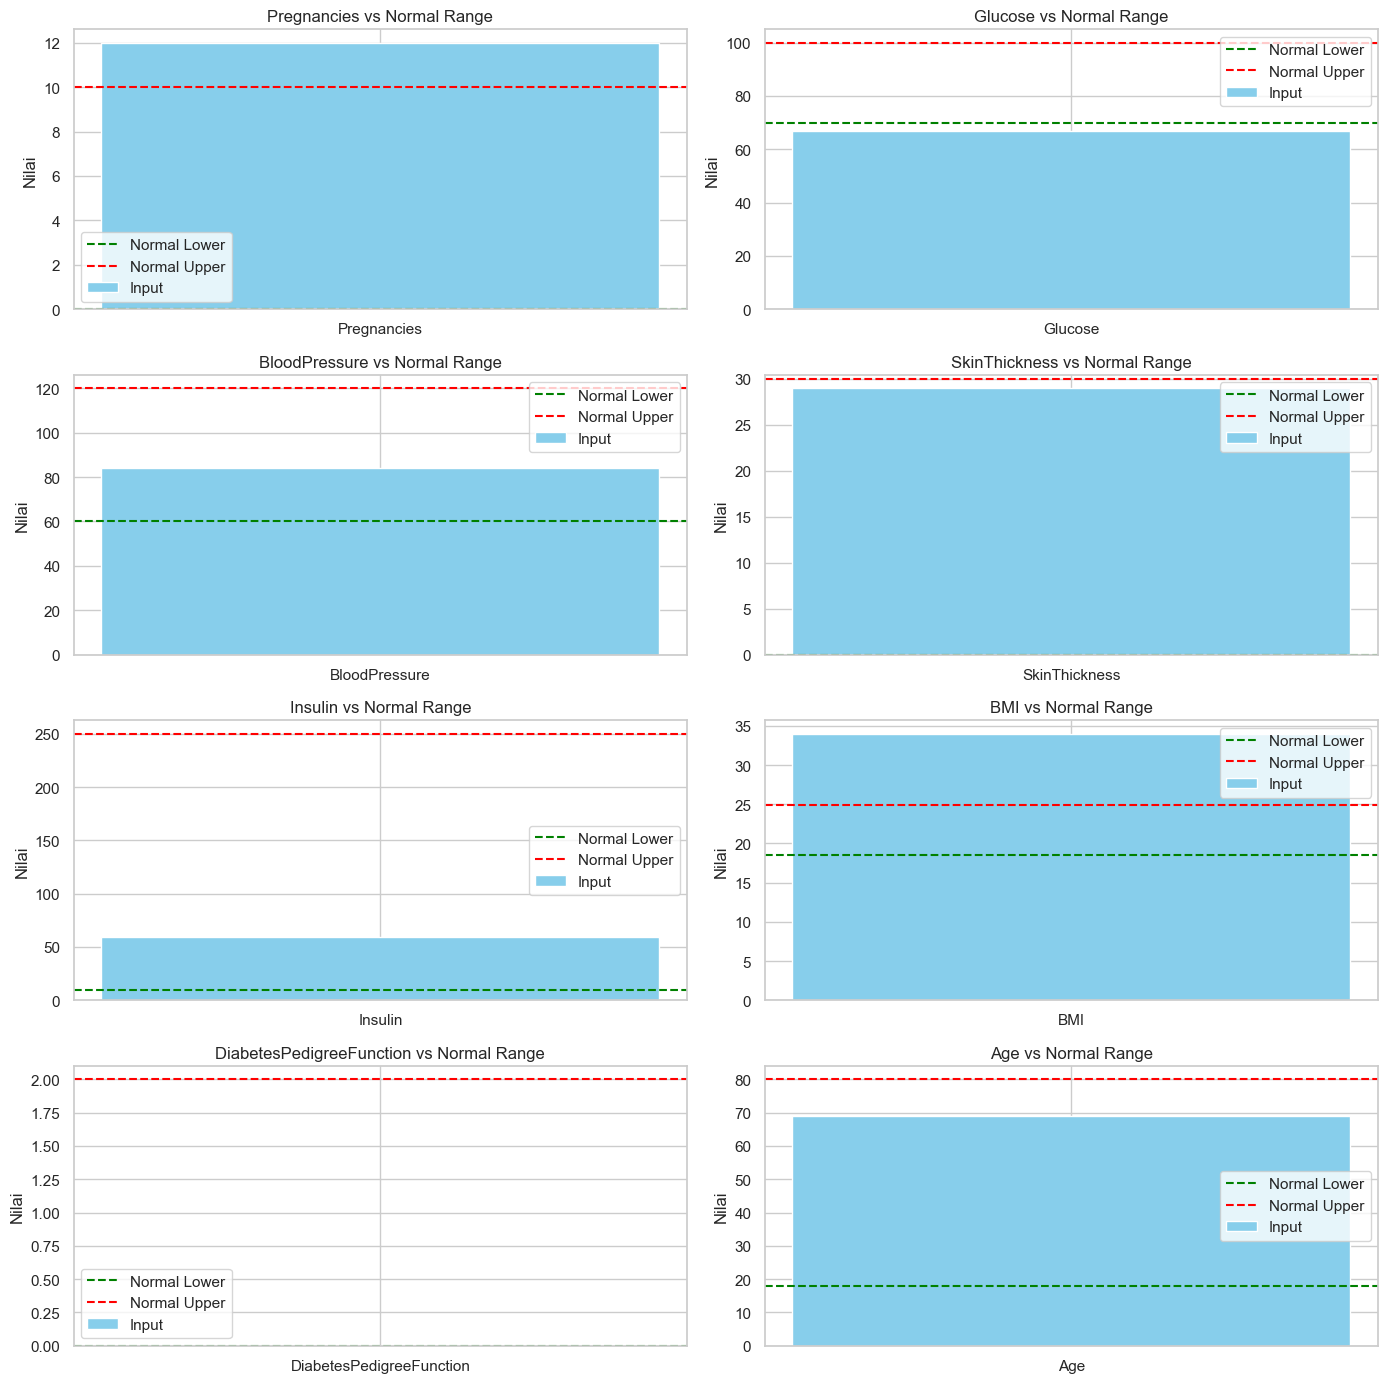

In [ ]:
# ========================
# Prediksi untuk Data Pasien Baru
# ========================

# Membuat data pasien baru untuk prediksi
new_data = np.random.randint(
    [0, 50, 50, 10, 10, 18, 0, 18], 
    [15, 200, 120, 80, 300, 50, 2, 80], 
    size=(1, 8)
)
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
new_data_df = pd.DataFrame(new_data, columns=columns)

print("Data Pasien (Input Baru):")
print(new_data_df)

# Normalisasi data baru
new_data_scaled = scaler.transform(new_data_df)

# Menampilkan data baru setelah normalisasi
best_model = models["Logistic Regression"]
prediction = best_model.predict(new_data_scaled)
prediction_prob = best_model.predict_proba(new_data_scaled)

# Interpretasi Hasil
if prediction[0] == 1:
    prediction_result = "Diabetes (1)"
    prediction_probability = prediction_prob[0][1]
else:
    prediction_result = "Tidak Diabetes (0)"
    prediction_probability = prediction_prob[0][0]

print(f"\nHasil Prediksi: {prediction_result}")
print(f"Probabilitas Keyakinan Model: {prediction_probability:.4f}")

# Analisis Fitur Risiko
if prediction[0] == 1:
    print("\nIndikator Risiko Diabetes:")
    if new_data_df['Glucose'][0] > 140:
        print("  - Kadar glukosa tinggi.")
    if new_data_df['BMI'][0] > 30:
        print("  - BMI menunjukkan obesitas.")
    if new_data_df['Age'][0] > 45:
        print("  - Usia di atas 45 tahun.")
    if new_data_df['DiabetesPedigreeFunction'][0] > 0.5:
        print("  - Ada faktor genetik (riwayat keluarga).")
else:
    print("\nIndikator Risiko Tidak Diabetes:")
    print("  - Semua fitur berada dalam rentang yang wajar.")

# Visualisasi nilai input vs batas normal
fig, axes = plt.subplots(4, 2, figsize=(14, 14))
axes = axes.flatten()

normal_limits = {
    'Glucose': [70, 100],
    'BMI': [18.5, 24.9],
    'Age': [18, 80],
    'Pregnancies': [0, 10],
    'BloodPressure': [60, 120],
    'SkinThickness': [0, 30],
    'Insulin': [10, 250],
    'DiabetesPedigreeFunction': [0, 2]
}

for i, feature in enumerate(columns):
    ax = axes[i]
    ax.bar(feature, new_data_df[feature][0], color='skyblue', label='Input')
    low, high = normal_limits[feature]
    ax.axhline(y=low, color='green', linestyle='--', label='Normal Lower')
    ax.axhline(y=high, color='red', linestyle='--', label='Normal Upper')
    ax.set_title(f"{feature} vs Normal Range")
    ax.set_ylabel("Nilai")
    ax.legend()

plt.tight_layout()
plt.show()

### Insight

Model yang digunakan dalam analisis ini mampu mengidentifikasi kemungkinan **diabetes** pada pasien berdasarkan data medis yang diberikan. Pada contoh prediksi ini, model memperkirakan bahwa individu tersebut memiliki peluang sebesar **87,90%** untuk terdiagnosis **diabetes** (**Prediksi: Diabetes**), yang menunjukkan tingkat keyakinan model yang cukup tinggi terhadap hasil tersebut.

Beberapa faktor risiko utama yang memengaruhi prediksi model antara lain:

- **Kadar glukosa darah** pasien tercatat sebesar **151 mg/dL**, yang melebihi ambang batas normal (≤140 mg/dL). Nilai ini merupakan salah satu indikator paling penting dalam diagnosis diabetes.
- **BMI (Indeks Massa Tubuh)** pasien juga berada di atas rentang normal, menandakan adanya obesitas. Kondisi ini diketahui secara medis sebagai salah satu faktor risiko utama untuk diabetes tipe 2.
- **Usia pasien** yang sudah di atas 45 tahun semakin memperkuat kemungkinan terjadinya diabetes, karena risiko penyakit ini memang meningkat seiring bertambahnya usia.

Kombinasi dari kadar glukosa yang tinggi, obesitas, dan usia lanjut memberikan dasar yang kuat bagi model untuk mengklasifikasikan pasien ini sebagai individu dengan risiko tinggi diabetes. Dengan demikian, hasil prediksi model tidak hanya didasarkan pada perhitungan statistik, tetapi juga sejalan dengan pengetahuan medis yang berlaku, sehingga dapat membantu dalam pengambilan keputusan klinis secara lebih informatif dan akurat.